# Exam set 
## date : 20/01 - 2023


### Import of libraries and external functions

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import Minuit
from scipy import stats
import math 
import sympy as sp
from IPython.core.display import Latex
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import sys

In [70]:
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import  nice_string_output, add_text_to_ax 

In [71]:
sys.path.append('My_Functions')
from My_Functions import *
plot_pref()
r = np.random
r.seed(16)

## Problem 5

In [72]:
dataframe = pd.read_csv('data_GlacierSizes.csv', header=0, index_col=None)
Area, sigArea, Volume, sigVolume = dataframe.values.T


In [73]:
#We quickly sort the data by area
sort = np.argsort(Area)
Area = Area[sort]
sigArea = sigArea[sort]
Volume = Volume[sort]
sigVolume = sigVolume[sort]

The mean relative eror of the area is 0.013281048830950434
The mean relative eror of the volume is 0.10065155981461331


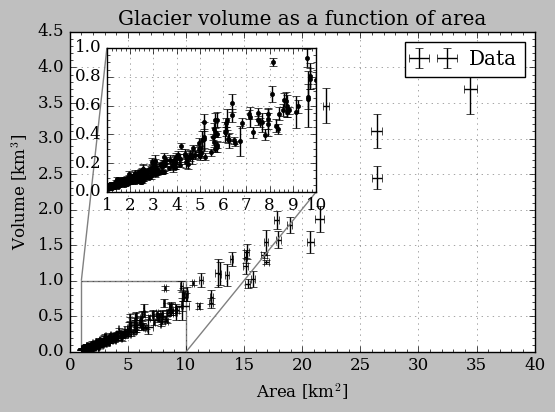

In [74]:
#5.1

fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(Area, Volume, xerr=sigArea, yerr=sigVolume, fmt=' ', label='Data', color = 'black')
ax.set_xlabel('Area [km$^2$]')
ax.set_ylabel('Volume [km$^3$]')
ax.set_title('Glacier volume as a function of area')
ax.legend()

ax_zoom = ax.inset_axes([0.08, 0.5, 0.45, 0.45])
zoom_mask = Area < 10
ax_zoom.errorbar(Area[zoom_mask], Volume[zoom_mask], yerr=sigVolume[zoom_mask], fmt='.', color = 'black', label='Data')
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5");


print('The mean relative eror of the area is', np.mean(sigArea/Area))
print('The mean relative eror of the volume is', np.mean(sigVolume/Volume))

#fig.savefig('figures/51.png')

In [75]:
#5.2
#We define the fit function
#Assume that V similar to A^3/2 means offset and slope
def fit_func(x, a, b):
    return a*x**(3/2) + b


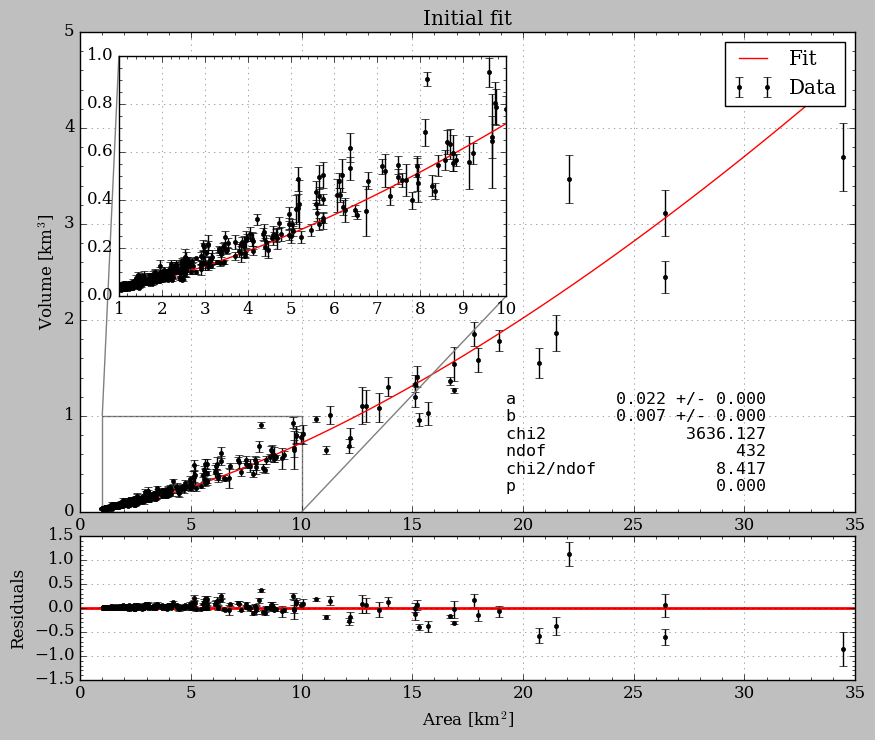

In [95]:
#We fit with the function
chi2 = Chi2Regression(fit_func, Area, Volume, sigVolume)
minuit = Minuit(chi2, a=1, b=1)
minuit.migrad();

#We plot the fit
fig, ax = plt.subplots(figsize=(10, 6))
X = np.linspace(np.min(Area), np.max(Area), 100)
ax.errorbar(Area, Volume, yerr=sigVolume, fmt='.', label='Data', color = 'black')
ax.plot(X, fit_func(X, *minuit.values), label='Fit', color = 'red')

ax.set_ylabel('Volume [km$^3$]')
ax.set_title('Initial fit')
ax.legend()

residuals = Volume - fit_func(Area, *minuit.values)  
ax_residual = plot_residuals(ax, Area, residuals , sigVolume, 'Area [km$^2$]')



chi2, ndof, p = evaluate_chi2(minuit, len(Area))
d = {
    'a': [minuit.values['a'], minuit.errors['a']],
    'b': [minuit.values['b'], minuit.errors['b']],
    'chi2': chi2,
    'ndof': ndof,
    'chi2/ndof': chi2/ndof,
    'p': p
}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.55, 0.25, text, ax, fontsize=12)

ax_zoom = ax.inset_axes([0.05, 0.45, 0.5, 0.5])
zoom_mask = Area < 10
ax_zoom.errorbar(Area[zoom_mask], Volume[zoom_mask], yerr=sigVolume[zoom_mask], fmt='.', color = 'black', label='Data')
ax_zoom.plot(Area[zoom_mask], fit_func(Area[zoom_mask], *minuit.values), color = 'red', label='Fit')
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5");

#ax_hist = ax.inset_axes([0.05, 0.7 , 0.3, 0.25])
#ax_hist.hist(residuals, bins=50, orientation='vertical', color='black', histtype='stepfilled')
#ax_hist.set_title('Residuals')

#fig.savefig('figures/52.png')

In [77]:
print('The mean of the residuals is', np.mean(residuals))
print('The average z for the residuals', np.mean(residuals/sigVolume))
minuit

The mean of the residuals is 0.012150257981108872
The average z for the residuals 1.041057578324349


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3636                       │              Nfcn = 42               │
│ EDM = 1.88e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 22.49e-3  │  0.14e-3  │            │            │         │         │       │
│ 1 │ b    │  7.42e-3  │  0.30e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  1.83e-08 -3.21e-08 │
│ b │ -3.21e-08  8.74e-08 │
└───┴─────────────────────┘

In [78]:
#5.3
#I don't like the fit 
#We perform runstest because we suspect oscillations

#The number of runs in the data
runs = get_runs(residuals)
print('The number of runs in the data is', len(runs))
z, p, N_exp, sig_exp = runstest(residuals)
print('the expected number of runs is', N_exp, '+/-', sig_exp)
print('The p-value of the runstest is', p, 'and the z-value is', z)



The number of runs in the data is 158
the expected number of runs is 167.19354838709677 +/- 10.742979793999245
The p-value of the runstest is 0.3921235410041868 and the z-value is -0.8557726592981261


My_Functions\My_Functions.py:211: RuntimeWarning: overflow encountered in long_scalars
  sig_expected = (2*N_A*N_B*(2*N_A*N_B - N))/(N**2*(N-1))


The mean of the residuals is 1.041057578324349


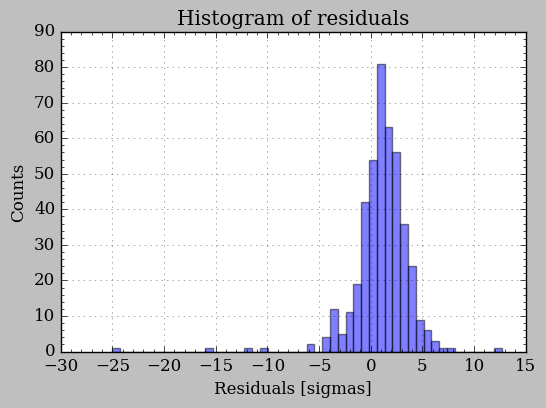

In [79]:
#We plot a histogram of how many sigmas each point is away from the fit
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(residuals/sigVolume, bins=50, orientation='vertical', alpha = 0.5) 
ax.set_xlabel('Residuals [sigmas]')
ax.set_ylabel('Counts')
ax.set_title('Histogram of residuals')

#fig.savefig('figures/53sigHist.png')
print('The mean of the residuals is', np.mean(residuals/sigVolume))

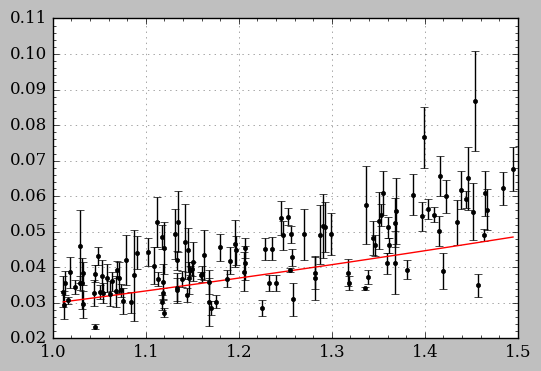

In [80]:
#We take a closer look on the values with area between 0 and 4
mask = (Area > 0) & (Area < 1.5)
fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(Area[mask], Volume[mask], yerr=sigVolume[mask], fmt='.', label='Data', color = 'black')
ax.plot(Area[mask], fit_func(Area[mask], *minuit.values), label='Fit', color = 'red')

In [184]:
def fit_func2(x, a, b, c):
    return a*x**(3/2) + b + c*x

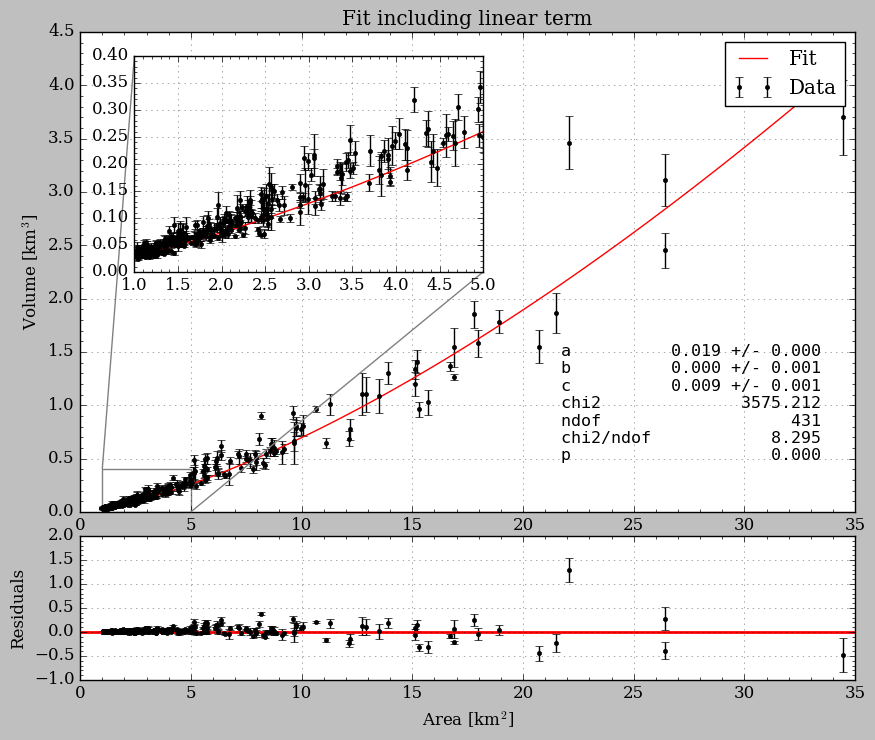

In [194]:
#We fit with the function
chi2_2 = Chi2Regression(fit_func2, Area, Volume, sigVolume)
minuit_2 = Minuit(chi2_2, a=1, b=1, c=1)
minuit_2.migrad();

#We plot the fit
fig, ax = plt.subplots(figsize=(10, 6))
X = np.linspace(np.min(Area), np.max(Area), 100)
ax.errorbar(Area, Volume, yerr=sigVolume, fmt='.', label='Data', color = 'black')
ax.plot(X, fit_func2(X, *minuit_2.values), label='Fit', color = 'red')

ax.set_ylabel('Volume [km$^3$]')
ax.set_title('Fit including linear term')
ax.legend()

residuals_2 = Volume - fit_func2(Area, *minuit_2.values) 
ax_residual = plot_residuals(ax, Area, residuals_2 , sigVolume, 'Area [km$^2$]')

chi2_2, ndof_2, p_2 = evaluate_chi2(minuit_2, len(Area))
d = {
    'a': [minuit_2.values['a'], minuit_2.errors['a']],
    'b': [minuit_2.values['b'], minuit_2.errors['b']],
    'c': [minuit_2.values['c'], minuit_2.errors['c']],
    'chi2': chi2_2,
    'ndof': ndof_2,
    'chi2/ndof' : chi2_2/ndof_2,
    'p': p_2
}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.35, text, ax, fontsize=12)

ax_zoom = ax.inset_axes([0.07, 0.5, 0.45, 0.45])
zoom_mask = Area < 5
ax_zoom.errorbar(Area[zoom_mask], Volume[zoom_mask], yerr=sigVolume[zoom_mask], fmt='.', color = 'black', label='Data')
ax_zoom.plot(Area[zoom_mask], fit_func2(Area[zoom_mask], *minuit_2.values), label='Fit', color = 'red')
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5");

#fig.savefig('figures/54.png')



In [186]:
minuit_2

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3575                       │              Nfcn = 80               │
│ EDM = 1.94e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  19.1e-3  │  0.4e-3   │            │            │         │         │       │
│ 1 │ b    │  0.5e-3   │  0.9e-3   │            │            │         │         │       │
│ 2 │ c    │  0.0090   │  0.0012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │  2.02e-07  3.48e-07 -4.95e-07 │
│ b │  3.48e-07  8.74e-07 -1.03e-06 │
│ c │ -4.95e-07 -1.03e-06  1.34e-06 │
└───┴───────────────────────────────┘

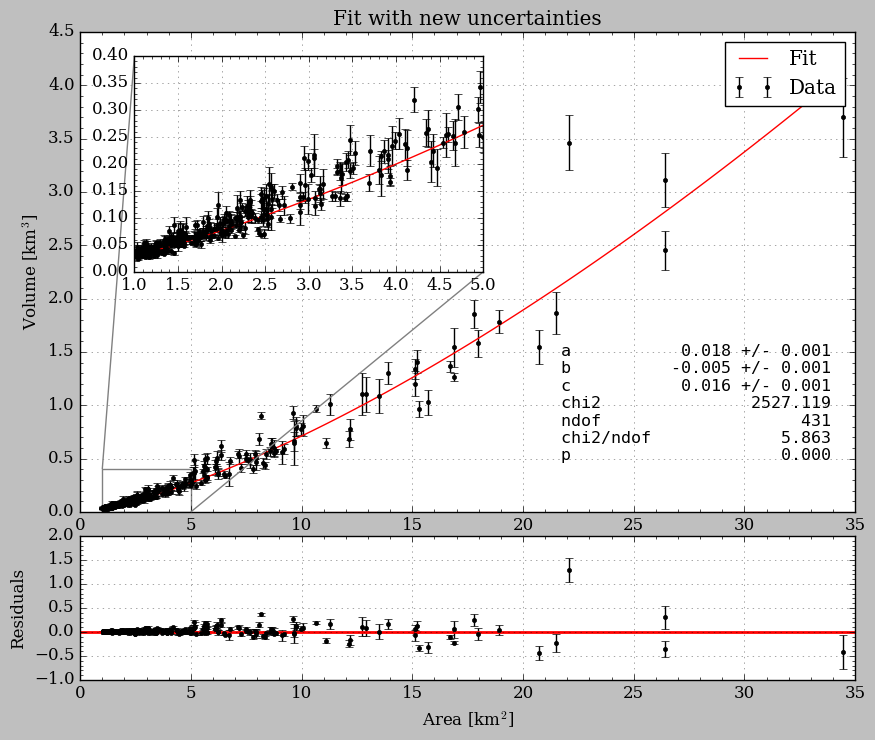

In [195]:
#We fit with the function
sigVolume_new = np.sqrt(sigVolume**2 + (3/2*minuit_2.values['a']*Area**(1/2) + minuit_2.values['c'])**2*sigArea**2)
chi2_3 = Chi2Regression(fit_func2, Area, Volume, sigVolume_new)
minuit_3 = Minuit(chi2_3, a=1, b=1, c=1)
minuit_3.migrad();

#We plot the fit
fig, ax = plt.subplots(figsize=(10, 6))
X = np.linspace(np.min(Area), np.max(Area), 100)
ax.errorbar(Area, Volume, yerr=sigVolume_new, fmt='.', label='Data', color = 'black')
ax.plot(X, fit_func2(X, *minuit_3.values), label='Fit', color = 'red')

ax.set_ylabel('Volume [km$^3$]')
ax.set_title('Fit with new uncertainties')
ax.legend()

residuals_3 = Volume - fit_func2(Area, *minuit_3.values) 
ax_residual = plot_residuals(ax, Area, residuals_3 , sigVolume, 'Area [km$^2$]')

chi2_3, ndof_3, p_3 = evaluate_chi2(minuit_3, len(Area))
d = {
    'a': [minuit_3.values['a'], minuit_3.errors['a']],
    'b': [minuit_3.values['b'], minuit_3.errors['b']],
    'c': [minuit_3.values['c'], minuit_3.errors['c']],
    'chi2': chi2_3,
    'ndof': ndof_3,
    'chi2/ndof' : chi2_3/ndof_3,
    'p': p_3
}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.35, text, ax, fontsize=12)

ax_zoom = ax.inset_axes([0.07, 0.5, 0.45, 0.45])
zoom_mask = Area < 5
ax_zoom.errorbar(Area[zoom_mask], Volume[zoom_mask], yerr=sigVolume_new[zoom_mask], fmt='.', color = 'black', label='Data')
ax_zoom.plot(Area[zoom_mask], fit_func2(Area[zoom_mask], *minuit_3.values), label='Fit', color = 'red')
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5");

#fig.savefig('figures/55.png')

In [201]:
minuit_3.covariance[1,1]

1.16495439423341e-06

In [202]:
test_A = 0.5
test_V = fit_func2(test_A, *minuit_3.values)
unc_V = np.sqrt(minuit_3.errors['a']**2*test_A**(3) + minuit_3.errors['b']**2 + minuit_3.errors['c']**2*test_A**2 + 2*test_A**(3/2)*minuit_3.covariance[0,1] + 2*test_A**(5/2)*minuit_3.covariance[0,2] + 2*test_A*minuit_3.covariance[1,2])
print('Volume = {:.5f} +/- {:.5f}'.format(test_V, unc_V))


Volume = 0.00955 +/- 0.00061
